In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10,cifar100

%matplotlib inline
tf.__version__

'2.6.0'

In [4]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



In [6]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
X_train = X_train / 255.0

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test = X_test / 255.0

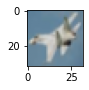

In [10]:
plt.figure(figsize=(1,2))
plt.imshow(X_test[10])

# Building a Convolutional neural network

In [25]:
model = tf.keras.models.Sequential()

In [26]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

In [27]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [28]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [29]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [30]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [31]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [32]:
model.add(tf.keras.layers.Flatten())

In [33]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [34]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["sparse_categorical_accuracy"])

In [37]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.9554 - sparse_categorical_accuracy: 0.2956
Epoch 2/5
1563/1563 [==============================] - ETA: 0s - loss: 1.5449 - sparse_categorical_accuracy: 0.445 - 88s 56ms/step - loss: 1.5450 - sparse_categorical_accuracy: 0.4459
Epoch 3/5
1098/1563 [====================>.........] - ETA: 27s - loss: 1.3868 - sparse_categorical_accuracy: 0.5028

KeyboardInterrupt: 

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 1.3304 - sparse_categorical_accuracy: 0.5229


In [39]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.5228999853134155


In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 147s 94ms/step - loss: 10.0338 - accuracy: 0.1081
Epoch 2/5
1563/1563 [==============================] - 142s 91ms/step - loss: 9.9929 - accuracy: 0.1021
Epoch 3/5
1563/1563 [==============================] - 142s 91ms/step - loss: 9.9929 - accuracy: 0.0999
Epoch 4/5
1563/1563 [==============================] - 173s 111ms/step - loss: 9.9929 - accuracy: 0.0985
Epoch 5/5
1563/1563 [==============================] - 168s 107ms/step - loss: 9.9929 - accuracy: 0.1006 - loss: 9


In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 9.9929 - accuracy: 0.1000


In [26]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.10000000149011612
